<p>&nbsp;</p>
<img src="https://1000logos.net/wp-content/uploads/2017/05/Reddit-logo.png" width=400>
<p>&nbsp;</p>

## Introduction

This is a brief exploratory data analysis using Pandas for a given public sample of random Reddit posts.
We will get a feel of a dataset and try to answer the following questions: 
* What are the most popular reddits? Which topics are viral?
* Which posts have been removed and why? 
* What % removed reddits are deleted by moderatos? 
* Who are the most popular authors? 
* Who are the biggest spammers at Reddit platform?


In [38]:
#Getting all the packages we need: 

import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package

import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

#Optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
#plt.style.use('ggplot') #R ggplot stype

## <a name="read"></a>Reading the dataset
Accessing Reddit dataset:

In [39]:
df = pd.read_csv('/kaggle/input/dataisbeautiful/r_dataisbeautiful_posts.csv')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df.sample(5)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
166223,1r4yug,Which fossil fuel companies are most responsib...,5,pnewell,NaN,NaN,NaN,NaN,1385041332,https://www.reddit.com/r/dataisbeautiful/comme...,3,False
6223,fl4uho,"Animation of today's M5.7 Magna, UT earthquake...",1,weatherghost,NaN,NaN,0.0,[],1584596777,https://www.reddit.com/r/dataisbeautiful/comme...,12,False
69998,7ep1ih,Google Search Trends Oct 22 - Nov 22 [OC],3,Subaru4Life88,NaN,NaN,NaN,NaN,1511334313,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
82073,6dezin,Clipping Path,1,oliviaoharris,NaN,NaN,NaN,NaN,1495775716,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
4644,fosd28,New York City (just the city) has it's own inc...,1,caronanumberguy,NaN,NaN,0.0,[],1585150694,https://www.reddit.com/r/dataisbeautiful/comme...,19,False


## <a name="feel"></a>Getting a feel of the dataset
Let's run basic dataframe exploratory commands

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173611 entries, 0 to 173610
Data columns (total 12 columns):
id                       173611 non-null object
title                    173610 non-null object
score                    173611 non-null int64
author                   173611 non-null object
author_flair_text        22029 non-null object
removed_by               6543 non-null object
total_awards_received    33605 non-null float64
awarders                 22930 non-null object
created_utc              173611 non-null int64
full_link                173611 non-null object
num_comments             173611 non-null int64
over_18                  173611 non-null bool
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 14.7+ MB


,score,total_awards_received,created_utc,num_comments
count,173611.000000,33605.000000,1.736110e+05,173611.000000
mean,193.861069,0.001280,1.491547e+09,25.282436
std,2001.160875,0.070061,6.137182e+07,195.280094
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.445138e+09,1.000000
50%,1.000000,0.000000,1.491085e+09,1.000000
75%,5.000000,0.000000,1.546150e+09,4.000000
max,116226.000000,8.000000,1.586792e+09,18801.000000


In [42]:
print("Data shape :",df.shape)

Data shape : (173611, 12)


In [43]:
#Empty values:

df.isnull().sum().sort_values(ascending = False)

removed_by               167068
author_flair_text        151582
awarders                 150681
total_awards_received    140006
title                         1
over_18                       0
num_comments                  0
full_link                     0
created_utc                   0
author                        0
score                         0
id                            0
dtype: int64

We note from the table above:
- There are `173,611` entries in the dataset. Caveat, not all columns in the dataset are complete. 
- The average reddit score `193`. The median value for the score is `1`, which means that a half of reddits in our dataset have the score `0` or `1` and only less than 75% reddits have the score more than `5`
- The most popular reddit has `18,801` comments, while the average is `25` and the median is `1`. 

## <a name="corr"></a>Removed reddits deep dive

Let's see who and why removes posts:

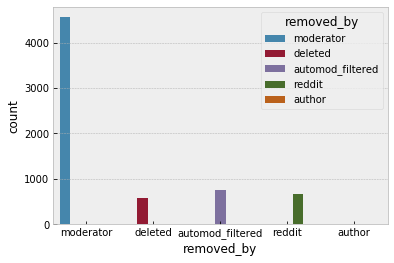

In [44]:
sns.countplot(x = 'removed_by', hue = 'removed_by', data = df)
#df.removed_by

>As we can see, the most deleted posts (68%) were removed by moderator. Less than 1% are deleted by authors.


## <a name="corr"></a>The most popular reddits

## <a name="corr"></a>The most common words in reddits:

Let's see the word map of the most commonly used words from reddit titles:

In [45]:
#To build a wordcloud, we have to remove NULL values first:
df["title"] = df["title"].fillna(value="")

In [46]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['title'].str.lower())

#word_string

(-0.5, 1599.5, 799.5, -0.5)

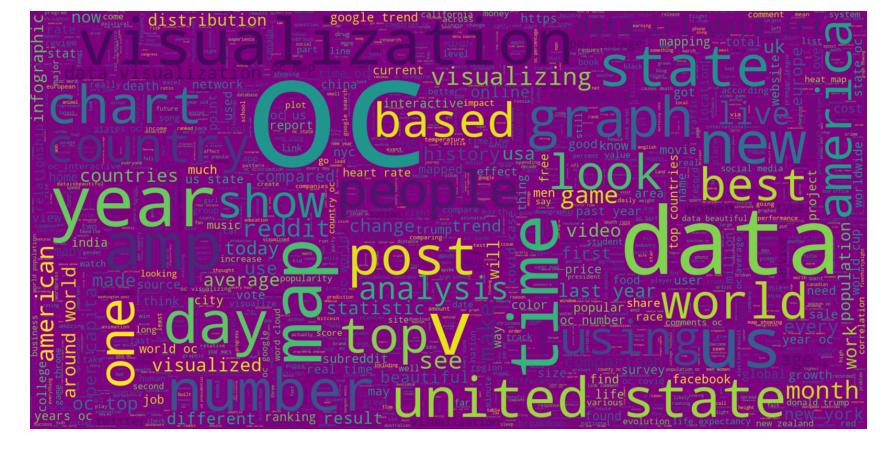

In [47]:
#And - plotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

## <a name="corr"></a>Comments distribution


>The average reddit has less than 25 comments. Let's see the comment distribution for those reddits who have <25 comments:

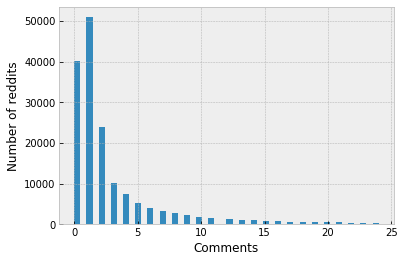

In [48]:
#Comments distribution plot:

fig, ax = plt.subplots()
_ = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="num_comments", ylabel="id")

plt.ylabel("Number of reddits")
plt.xlabel("Comments")

plt.show()

>As we can see, the most reddits have less than 5 comments. 

## <a name="corr"></a>Correlation between dataset variables

Now let's see how the dataset variables are correlated with each other:
* How score and comments are correlated? 
* Do they increase and decrease together (positive correlation)? 
* Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

* Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [49]:
df.corr()

,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.222506,0.029288,0.637163,0.018861
total_awards_received,0.222506,1.000000,0.015877,0.135040,0.008467
created_utc,0.029288,0.015877,1.000000,0.024414,0.011568
num_comments,0.637163,0.135040,0.024414,1.000000,0.028636
over_18,0.018861,0.008467,0.011568,0.028636,1.000000


We see that score and number of comments are highly positively correlated with a correlation value of 0.6. 

There is some positive correlation of 0.2 between total awards received and score (0.2) and num_comments (0.1).

Now let's visualize the correlation table above using a heatmap


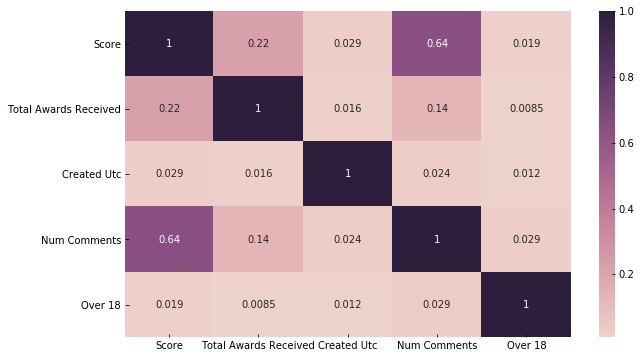

In [50]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

## <a name="corr"></a>Score distribution


In [51]:
df.score.describe()

count    173611.000000
mean        193.861069
std        2001.160875
min           0.000000
25%           1.000000
50%           1.000000
75%           5.000000
max      116226.000000
Name: score, dtype: float64

In [52]:
df.score.median()

1.0

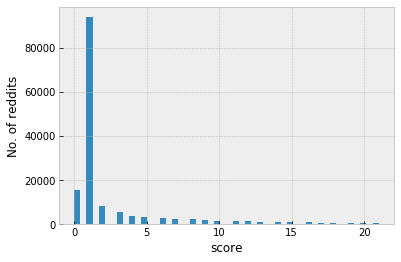

In [53]:
#Score distribution: 

fig, ax = plt.subplots()
_ = sns.distplot(df[df["score"] < 22]["score"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="score", ylabel="No. of reddits")